# **HOLIDAY PACKAGE PROJECT**

## **Exploratory Data Analysis**

**Features**

1. CustomerID : Unique customer ID
2. ProdTaken : Whether the product is taken (1) or not (0)
3. Age : Age of the customer
4. TypeofContact : How customer was contacted (Company Invited or Self Inquiry)
5. CityTier : City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. DurationOfPitch : Duration of the pitch by a salesperson to the customer
7. Occupation : Occupation of customer
8. Gender : Gender of customer
9. NumberOfPersonVisiting : Total number of persons planning to take the trip with the customer
10. NumberOfFollowups : Total number of follow-ups has been done by the salesperson after the sales pitch
11. ProductPitched : Product pitched by the salesperson
12. PreferredPropertyStar : Preferred hotel property rating by customer
13. MaritalStatus : Marital status of customer
14. NumberOfTrips : Average number of trips in a year by customer
15. Passport : The customer has a passport or not (0: No, 1: Yes)
16. PitchSatisfactionScore : Sales pitch satisfaction score
17. OwnCar : Whether the customers own a car or not (0: No, 1: Yes)
18. NumberOfChildrenVisiting : Total number of children with age less than 5 planning to take the trip with the customer
19. Designation : Designation of the customer in the current organization
20. MonthlyIncome : Gross monthly income of the customer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

In [2]:
data = pd.read_csv('Travel.csv')
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### **Data Understanding**

In [3]:
# pengelompokkan kolom berdasarkan jenisnya
nums = ['Age','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']
cats = ['ProdTaken','CityTier','TypeofContact','Occupation','Gender','OwnCar','Passport','ProductPitched','PreferredPropertyStar','PitchSatisfactionScore','MaritalStatus','Designation']

In [3]:
def cats_columns(df,list_item):
    item=[]
    for col in list_item:
        item.append([col, 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()])
    desc_df = pd.DataFrame(data=item, columns='Feature,Null(%),Unique,Unique Sample'.split(","))
    return desc_df

In [4]:
def nums_columns(df,list_item):
    item=[]
    for col in list_item:
        item.append([col, 100*df[col].isna().sum()/len(df[col]), df[col].nunique(),df[col].min(),df[col].max(),df[col].mean(),df[col].median(),df[col].var(),df[col].std(), df[col].unique()])
    desc_df = pd.DataFrame(data=item, columns='Feature,Null(%),Unique,Min,Max,Average,Median,Variance, Standar Deviation, Unique Sample'.split(","))
    return desc_df

In [6]:
nums_columns(data,nums)

,Feature,Null(%),Unique,Min,Max,Average,Median,Variance,Standar Deviation,Unique Sample
0,Age,4.623568,44,18.0,61.0,37.622265,36.0,8.679507e+01,9.316387,"[41.0, 49.0, 37.0, 33.0, nan, 32.0, 59.0, 30.0..."
1,DurationOfPitch,5.135025,34,5.0,127.0,15.490835,13.0,7.258431e+01,8.519643,"[6.0, 14.0, 8.0, 9.0, 30.0, 29.0, 33.0, 22.0, ..."
2,NumberOfPersonVisiting,0.000000,5,1.0,5.0,2.905074,3.0,5.254664e-01,0.724891,"[3, 2, 1, 4, 5]"
3,NumberOfFollowups,0.920622,6,1.0,6.0,3.708445,4.0,1.005024e+00,1.002509,"[3.0, 4.0, 2.0, 5.0, nan, 1.0, 6.0]"
4,NumberOfTrips,2.864157,12,1.0,22.0,3.236521,3.0,3.418872e+00,1.849019,"[1.0, 2.0, 7.0, 5.0, 6.0, 3.0, 4.0, 19.0, 21.0..."
5,NumberOfChildrenVisiting,1.350245,4,0.0,3.0,1.187267,1.0,7.359258e-01,0.857861,"[0.0, 2.0, 1.0, nan, 3.0]"
6,MonthlyIncome,4.766776,2475,1000.0,98678.0,23619.853491,22347.0,2.895191e+07,5380.698361,"[20993.0, 20130.0, 17090.0, 17909.0, 18468.0, ..."


In [7]:
cats_columns(data,cats)

,Feature,Null(%),Unique,Unique Sample
0,ProdTaken,0.000000,2,"[1, 0]"
1,CityTier,0.000000,3,"[3, 1, 2]"
2,TypeofContact,0.511457,2,"[Self Enquiry, Company Invited, nan]"
3,Occupation,0.000000,4,"[Salaried, Free Lancer, Small Business, Large ..."
4,Gender,0.000000,3,"[Female, Male, Fe Male]"
5,OwnCar,0.000000,2,"[1, 0]"
6,Passport,0.000000,2,"[1, 0]"
7,ProductPitched,0.000000,5,"[Deluxe, Basic, Standard, Super Deluxe, King]"
8,PreferredPropertyStar,0.531915,3,"[3.0, 4.0, 5.0, nan]"
9,PitchSatisfactionScore,0.000000,5,"[2, 3, 5, 4, 1]"


In [8]:
# Missing values in each row
mv=round((data[data.isnull().sum(axis=1)>0].isnull().sum(axis=1).value_counts()/data.shape[0])*100,1).reset_index().rename(columns={'index':'Missing Values in Each Row',0:'Amount of Rows(%)'})
mv.loc['Total']=['',mv[mv['Missing Values in Each Row']>0]['Amount of Rows(%)'].sum()]
mv

,Missing Values in Each Row,Amount of Rows(%)
0,1,10.9
1,2,4.1
2,3,0.5
Total,,15.5


### **Univariate Analysis**

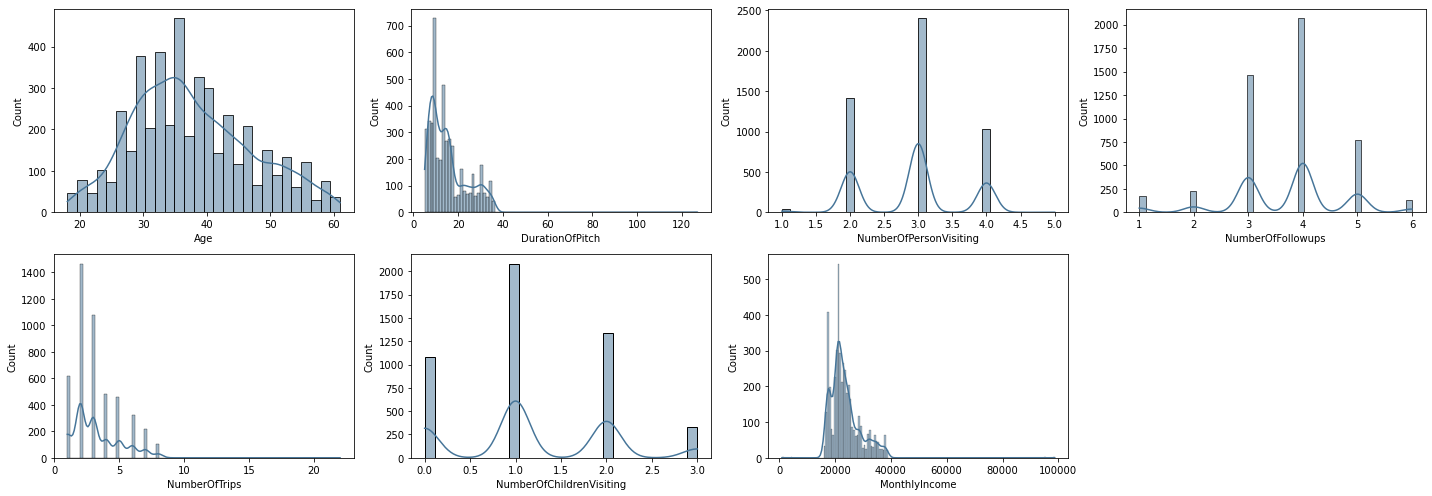

In [10]:
features = nums
plt.figure(figsize=(20,7))
for i in range(0, len(nums)):
    plt.subplot(2, int((len(nums)+1)/2), i+1)
    sns.histplot(x=data[features[i]], color="#467599", kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

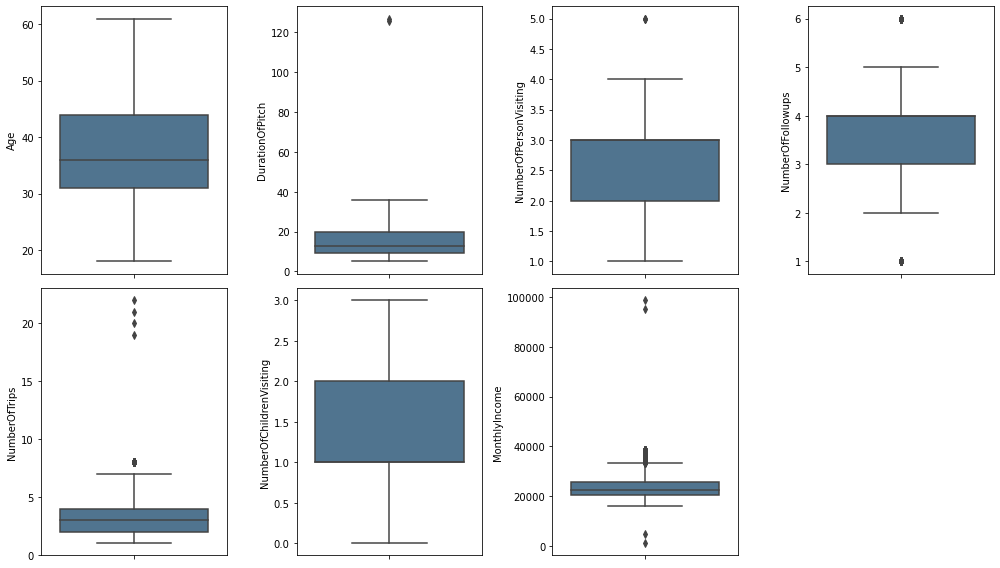

In [11]:
plt.figure(figsize=(14,8))
for i in range(0, len(nums)):
    plt.subplot(2, int((len(nums)+1)/2), i+1)
    sns.boxplot(y=data[nums[i]], color="#467599", orient='v')
    plt.tight_layout()

In [12]:
# Check outliers
list_item=[]
for col in nums:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    low_lim = q1 - 1.5*iqr
    up_lim = q3 + 1.5*iqr
    outlier = []
    for x in data[col]:
        if ((x > up_lim) or (x < low_lim)):
            outlier.append(x)
    list_item.append([col, q1,q3, low_lim, up_lim, len(outlier),round((len(outlier)/data.shape[0])*100,2)])
outliers_df = pd.DataFrame(data=list_item, columns='Feature,25%,75%,Lower Limit,Upper Limit, Outlier, Outlier(%) '.split(","))
outliers_df

,Feature,25%,75%,Lower Limit,Upper Limit,Outlier,Outlier(%)
0,Age,31.0,44.0,11.5,63.5,0,0.00
1,DurationOfPitch,9.0,20.0,-7.5,36.5,2,0.04
2,NumberOfPersonVisiting,2.0,3.0,0.5,4.5,3,0.06
3,NumberOfFollowups,3.0,4.0,1.5,5.5,312,6.38
4,NumberOfTrips,2.0,4.0,-1.0,7.0,109,2.23
5,NumberOfChildrenVisiting,1.0,2.0,-0.5,3.5,0,0.00
6,MonthlyIncome,20346.0,25571.0,12508.5,33408.5,345,7.06


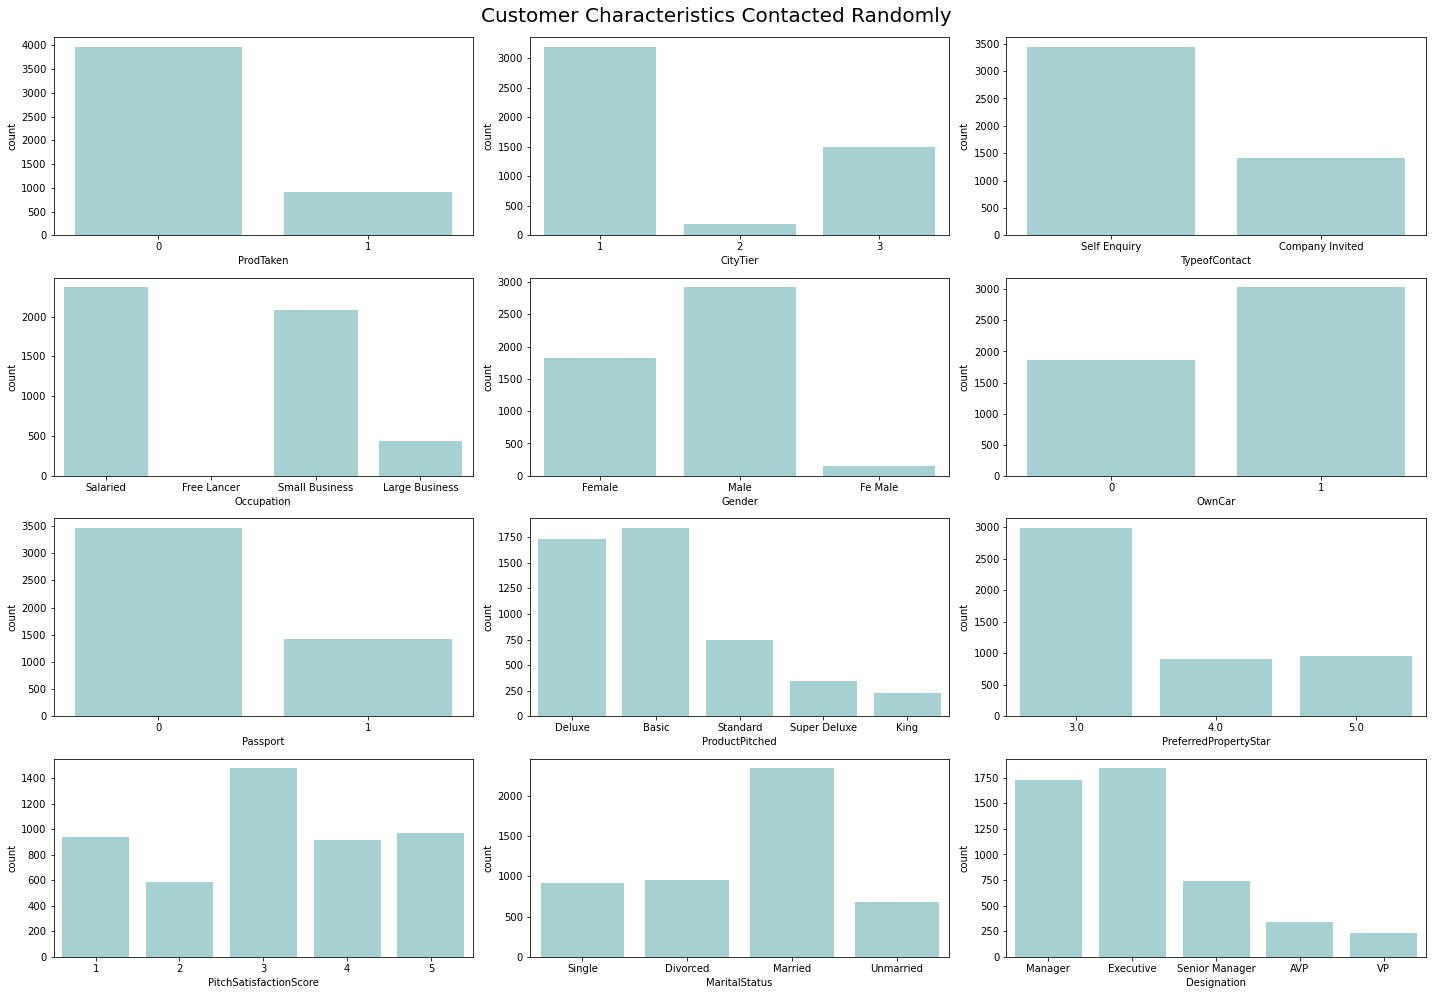

In [10]:
# Pengamatan variabel categorical
fig, axes = plt.subplots(3, 3, figsize=(20,13.5));
for c in range(0, len(cats)):
    plt.subplot(4, 3, c+1)
    sns.countplot(x = data[cats[c]], color="#9ed8db", orient='v')
plt.tight_layout()
fig.suptitle("Customer Characteristics Contacted Randomly",y=1.02, fontsize=20)
plt.show()

### **Multivariate Analysis**

In [11]:
data['Age_group'] = pd.cut(data['Age'],[18, 23, 29, 35, 41, 47, 53, max(data['Age'])], labels=['18 - 23', '24 - 29', '30 - 35', '36 - 41', '42 - 47', '48 - 53', '54 - 61'])
data['DurationPitch_group'] = pd.cut(data['DurationOfPitch'], [5, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, max(data.DurationOfPitch)], labels=['5-6', '7-8','9-10','11-12','13-14','15-16','17-18','19-20','21-22','23-24','25+'])

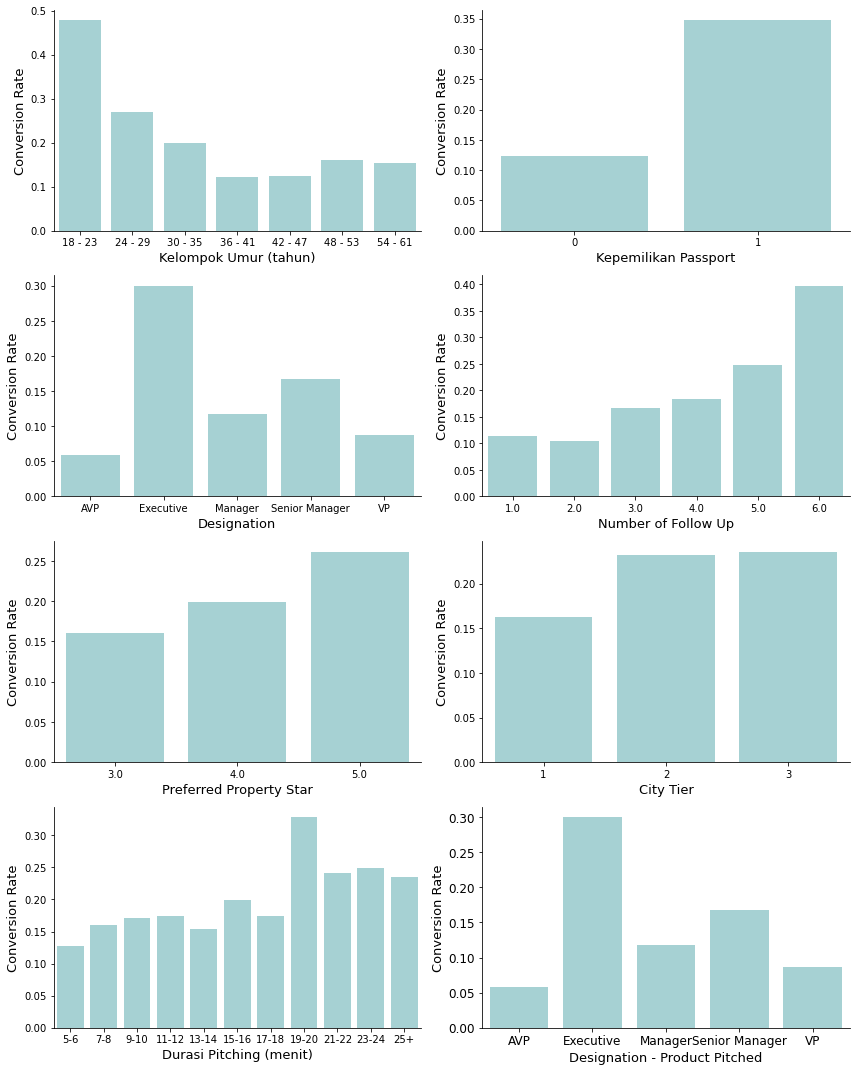

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(4,2, figsize=(12,15))
colors = ["#d64045", "#9ed8db", "#467599", "#1e9f9f"]

age = data.groupby('Age_group')['ProdTaken'].value_counts()/data.groupby('Age_group')['ProdTaken'].count()
age = age.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='Age_group', y= 'pct_conv_rate', data=age[age['ProdTaken'] == 1], color="#9ed8db", ax=ax[0][0])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('Kelompok Umur (tahun)', fontsize=13)

passport = data.groupby('Passport')['ProdTaken'].value_counts()/data.groupby('Passport')['ProdTaken'].count()
passport = passport.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='Passport', y= 'pct_conv_rate', data=passport[passport['ProdTaken'] == 1], color="#9ed8db", ax=ax[0][1])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('Kepemilikan Passport', fontsize=13)

designation = data.groupby('Designation')['ProdTaken'].value_counts()/data.groupby('Designation')['ProdTaken'].count()
designation = designation.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='Designation', y= 'pct_conv_rate', data=designation[designation['ProdTaken'] == 1], color="#9ed8db", ax=ax[1][0])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('Designation', fontsize=13)

fu = data.groupby('NumberOfFollowups')['ProdTaken'].value_counts()/data.groupby('NumberOfFollowups')['ProdTaken'].count()
fu = fu.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='NumberOfFollowups', y= 'pct_conv_rate', data=fu[fu['ProdTaken'] == 1], color="#9ed8db", ax=ax[1][1])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('Number of Follow Up', fontsize=13)

pps = data.groupby('PreferredPropertyStar')['ProdTaken'].value_counts()/data.groupby('PreferredPropertyStar')['ProdTaken'].count()
pps = pps.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='PreferredPropertyStar', y= 'pct_conv_rate', data=pps[pps['ProdTaken'] == 1], color="#9ed8db", ax=ax[2][0])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('Preferred Property Star', fontsize=13)

ct = data.groupby('CityTier')['ProdTaken'].value_counts()/data.groupby('CityTier')['ProdTaken'].count()
ct = ct.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='CityTier', y= 'pct_conv_rate', data=ct[ct['ProdTaken'] == 1], color="#9ed8db", ax=ax[2][1])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('City Tier', fontsize=13)

duration_pitch = data.groupby('DurationPitch_group')['ProdTaken'].value_counts()/data.groupby('DurationPitch_group')['ProdTaken'].count()
duration_pitch = duration_pitch.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='DurationPitch_group', y= 'pct_conv_rate', data=duration_pitch[duration_pitch['ProdTaken'] == 1], color="#9ed8db", ax=ax[3][0])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('Durasi Pitching (menit)', fontsize=13)

d_pp = data.groupby(['Designation','ProductPitched'])['ProdTaken'].value_counts()/data.groupby(['Designation','ProductPitched'])['ProdTaken'].count()
d_pp = d_pp.to_frame().rename(columns={'ProdTaken': 'pct_conv_rate'}).reset_index()
ax1 = sns.barplot(x='Designation', y= 'pct_conv_rate', data=d_pp[d_pp['ProdTaken'] == 1], color="#9ed8db", ax=ax[3][1])
ax1.set_ylabel('Conversion Rate', fontsize=13)
ax1.set_xlabel('Designation - Product Pitched', fontsize=13)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
sns.despine(right=True,top = True)  
plt.tight_layout()
plt.show()

For instance, in the feature passport, from the dist-plot, we can see that more than 50% of customers who have been chosen randomly don't have passports. Meanwhile, from the charts above, 0.12 or we can say only 12% of customers who don't have passports took the product.

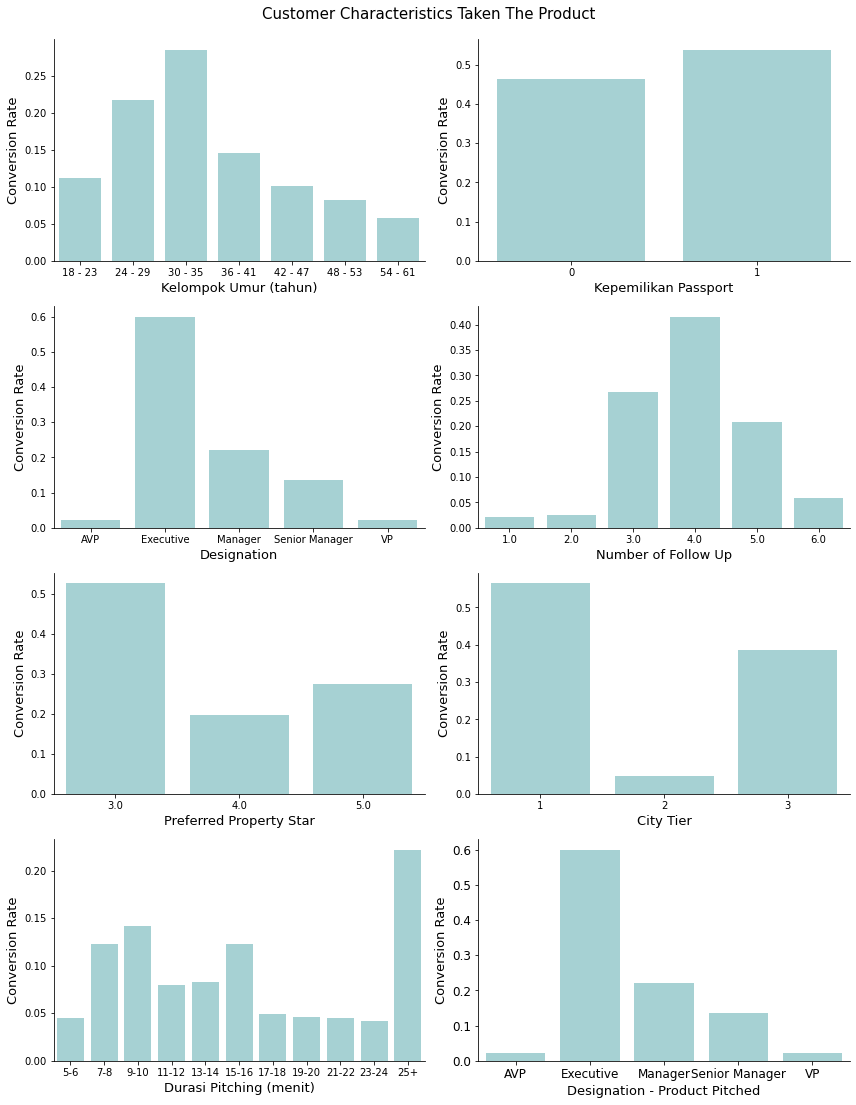

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax_1 = plt.subplots(4,2, figsize=(12,15))
colors = ["#d64045", "#9ed8db", "#467599", "#1e9f9f"]

age1 = data.groupby('Age_group')['ProdTaken'].sum().reset_index()
age1['rasio'] = round(age1['ProdTaken']/sum(age1['ProdTaken']), 3)
ax2 = sns.barplot(x='Age_group', y= 'rasio', data=age1, color="#9ed8db", ax=ax_1[0][0])
ax2.set_ylabel('Conversion Rate', fontsize=13)
ax2.set_xlabel('Kelompok Umur (tahun)', fontsize=13)

passport1 = data.groupby('Passport')['ProdTaken'].sum().reset_index()
passport1['rasio'] = round(passport1['ProdTaken']/sum(passport1['ProdTaken']), 3)
ax2 = sns.barplot(x='Passport', y= 'rasio', data=passport1, color="#9ed8db", ax=ax_1[0][1])
ax2.set_ylabel('Conversion Rate', fontsize=13)
ax2.set_xlabel('Kepemilikan Passport', fontsize=13)

designation1 = data.groupby('Designation')['ProdTaken'].sum().reset_index()
designation1['rasio'] = round(designation1['ProdTaken']/sum(designation1['ProdTaken']), 3)
ax2 = sns.barplot(x='Designation', y= 'rasio', data=designation1, color="#9ed8db", ax=ax_1[1][0])
ax2.set_ylabel('Conversion Rate', fontsize=13)
ax2.set_xlabel('Designation', fontsize=13)

fu1 = data.groupby('NumberOfFollowups')['ProdTaken'].sum().reset_index()
fu1['rasio'] = round(fu1['ProdTaken']/sum(fu1['ProdTaken']), 3)
ax2 = sns.barplot(x='NumberOfFollowups', y= 'rasio', data=fu1, color="#9ed8db", ax=ax_1[1][1])
ax2.set_ylabel('Conversion Rate', fontsize=13)
ax2.set_xlabel('Number of Follow Up', fontsize=13)

pps1 = data.groupby('PreferredPropertyStar')['ProdTaken'].sum().reset_index()
pps1['rasio'] = round(pps1['ProdTaken']/sum(pps1['ProdTaken']), 3)
ax2 = sns.barplot(x='PreferredPropertyStar', y= 'rasio', data=pps1, color="#9ed8db", ax=ax_1[2][0])
ax2.set_ylabel('Conversion Rate', fontsize=13)
ax2.set_xlabel('Preferred Property Star', fontsize=13)

ct1 = data.groupby('CityTier')['ProdTaken'].sum().reset_index()
ct1['rasio'] = round(ct1['ProdTaken']/sum(ct1['ProdTaken']), 3)
ax2 = sns.barplot(x='CityTier', y= 'rasio', data=ct1, color="#9ed8db", ax=ax_1[2][1])
ax2.set_ylabel('Conversion Rate', fontsize=13)
ax2.set_xlabel('City Tier', fontsize=13)

duration_pitch1 = data.groupby('DurationPitch_group')['ProdTaken'].sum().reset_index()
duration_pitch1['rasio'] = round(duration_pitch1['ProdTaken']/sum(duration_pitch1['ProdTaken']), 3)
ax2 = sns.barplot(x='DurationPitch_group', y= 'rasio', data=duration_pitch1, color="#9ed8db", ax=ax_1[3][0])
ax2.set_ylabel('Conversion Rate', fontsize=13)
ax2.set_xlabel('Durasi Pitching (menit)', fontsize=13)

d_pp1 = data.groupby(['Designation','ProductPitched'])['ProdTaken'].sum().reset_index()
d_pp1['rasio'] = round(d_pp1['ProdTaken']/sum(d_pp1['ProdTaken']), 3)
ax2 = sns.barplot(x='Designation', y= 'rasio', data=d_pp1, color="#9ed8db", ax=ax_1[3][1])
ax2.set_ylabel('Conversion Rate', fontsize=13)
ax2.set_xlabel('Designation - Product Pitched', fontsize=13)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
sns.despine(right=True,top = True)  
plt.tight_layout()
fig.suptitle("Customer Characteristics Taken The Product",y=1.02, fontsize=15)
plt.show()

These charts explain the characteristics of customers who took the product, for example, 52% of customers took the product preferred property with 3.0 stars.

## Observation For Further Actions Of Data

- There is a **mistaken value** on the feature "Gender" which is "Fe Male" when it should be "Female", and there is also an **inconsistent value** on the feature "MaritalStatus" which is "unmarried" which has the same meaning as "Single".
- **Missing values** exists on **eight features** with intervals of 0,5%-5,1%. Although the number of intervals is quite small, there are **15,5%** rows of data that at least have one missing value.
- **Outlier** is founded on 5 features, precisely 3 features contained **2%-7% outliers**. "MonthlyIncome" and "NumberOfFollowups" have up to 6% outliers on their data, then "NumberofTrips" has around 2% outliers.
- By the dist-plot, 3 features have **right-skewness** on their distribution.
- "ProdTaken" is the target on this data and it has 2 values, that is "0" and "1". By the dist-plot, we can see that there is 81% of customers took "0" and it caused an **imbalance on the target**.

## **Data Pre-Processing**

### **Splitting Data**

In [17]:
data = pd.read_csv('Travel.csv')

In [5]:
data.shape

(4888, 20)

In [6]:
from sklearn.model_selection import train_test_split
X = data.drop('ProdTaken', axis=1)
y = data['ProdTaken']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [7]:
#Cek the data
train =  pd.concat([X_train, pd.DataFrame(y_train)], axis=1)
test =  pd.concat([X_test, pd.DataFrame(y_test)], axis=1)

train.shape, test.shape

((3910, 20), (978, 20))

In [8]:
# pengelompokkan kolom berdasarkan jenisnya
nums = ['Age','DurationOfPitch','CityTier','PreferredPropertyStar','PitchSatisfactionScore','NumberOfPersonVisiting','NumberOfFollowups','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']
cats = ['ProdTaken','TypeofContact','Occupation','Gender','OwnCar','Passport','ProductPitched','MaritalStatus','Designation']

### **Change Incorrect Value and Drop CustomerID**

In [9]:
train.loc[train['Gender'] == 'Fe Male', 'Gender'] = 'Female'
train.loc[train['MaritalStatus'] == 'Unmarried', 'MaritalStatus'] = 'Single'
test.loc[test['Gender'] == 'Fe Male', 'Gender'] = 'Female'
test.loc[test['MaritalStatus'] == 'Unmarried', 'MaritalStatus'] = 'Single'

In [10]:
cats_columns(train,cats)

,Feature,Null(%),Unique,Unique Sample
0,ProdTaken,0.000000,2,"[0, 1]"
1,TypeofContact,0.434783,2,"[Self Enquiry, Company Invited, nan]"
2,Occupation,0.000000,4,"[Small Business, Salaried, Large Business, Fre..."
3,Gender,0.000000,2,"[Male, Female]"
4,OwnCar,0.000000,2,"[0, 1]"
5,Passport,0.000000,2,"[0, 1]"
6,ProductPitched,0.000000,5,"[Deluxe, Basic, Super Deluxe, Standard, King]"
7,MaritalStatus,0.000000,3,"[Married, Single, Divorced]"
8,Designation,0.000000,5,"[Manager, Executive, AVP, Senior Manager, VP]"


In [11]:
cats_columns(test,cats)

,Feature,Null(%),Unique,Unique Sample
0,ProdTaken,0.000000,2,"[1, 0]"
1,TypeofContact,0.817996,2,"[Self Enquiry, Company Invited, nan]"
2,Occupation,0.000000,3,"[Salaried, Small Business, Large Business]"
3,Gender,0.000000,2,"[Male, Female]"
4,OwnCar,0.000000,2,"[1, 0]"
5,Passport,0.000000,2,"[1, 0]"
6,ProductPitched,0.000000,5,"[Basic, Standard, Deluxe, Super Deluxe, King]"
7,MaritalStatus,0.000000,3,"[Single, Divorced, Married]"
8,Designation,0.000000,5,"[Executive, Senior Manager, Manager, AVP, VP]"


In [12]:
train.drop('CustomerID', axis=1, inplace=True)
test.drop('CustomerID', axis=1, inplace=True)

In [13]:
train.shape, test.shape

((3910, 19), (978, 19))

### **Feature Extraction**

1. Binning Feature `Age` based on [reference age structure in Saudi Arabia](https://www.indexmundi.com/saudi_arabia/age_structure.html) as `Age Structure`

  * 15-24 years (early working age)
  * 25-54 years (prime working age)
  * 55-64 years (mature working age)
  
  
 2. Make feature `MarketingCost` which is created by feature `DurationOfPitch` and `NumberOfFollowups`

In [14]:
train['AgeStructure'] = pd.cut(train['Age'], [15,24,54,64], labels=['Early Working Age','Prime Working Age', 'Mature Working Age'])
test['AgeStructure'] = pd.cut(test['Age'], [15,24,54,64], labels=['Early Working Age','Prime Working Age', 'Mature Working Age'])

In [15]:
cats.append("AgeStructure")

In [16]:
cats_columns(train,cats)

,Feature,Null(%),Unique,Unique Sample
0,ProdTaken,0.000000,2,"[0, 1]"
1,TypeofContact,0.434783,2,"[Self Enquiry, Company Invited, nan]"
2,Occupation,0.000000,4,"[Small Business, Salaried, Large Business, Fre..."
3,Gender,0.000000,2,"[Male, Female]"
4,OwnCar,0.000000,2,"[0, 1]"
5,Passport,0.000000,2,"[0, 1]"
6,ProductPitched,0.000000,5,"[Deluxe, Basic, Super Deluxe, Standard, King]"
7,MaritalStatus,0.000000,3,"[Married, Single, Divorced]"
8,Designation,0.000000,5,"[Manager, Executive, AVP, Senior Manager, VP]"
9,AgeStructure,4.680307,3,"[NaN, 'Prime Working Age', 'Early Working Age'..."


In [17]:
cats_columns(test,cats)

,Feature,Null(%),Unique,Unique Sample
0,ProdTaken,0.000000,2,"[1, 0]"
1,TypeofContact,0.817996,2,"[Self Enquiry, Company Invited, nan]"
2,Occupation,0.000000,3,"[Salaried, Small Business, Large Business]"
3,Gender,0.000000,2,"[Male, Female]"
4,OwnCar,0.000000,2,"[1, 0]"
5,Passport,0.000000,2,"[1, 0]"
6,ProductPitched,0.000000,5,"[Basic, Standard, Deluxe, Super Deluxe, King]"
7,MaritalStatus,0.000000,3,"[Single, Divorced, Married]"
8,Designation,0.000000,5,"[Executive, Senior Manager, Manager, AVP, VP]"
9,AgeStructure,4.396728,3,"['Prime Working Age', 'Mature Working Age', 'E..."


In [18]:
PhoneRate = 0.5
train['MarketingCost'] = train['DurationOfPitch'] * train['NumberOfFollowups'] * PhoneRate
test['MarketingCost'] = test['DurationOfPitch'] * test['NumberOfFollowups'] * PhoneRate

In [19]:
nums.append("MarketingCost")

In [20]:
nums_columns(train,nums)

,Feature,Null(%),Unique,Min,Max,Average,Median,Variance,Standar Deviation,Unique Sample
0,Age,4.680307,44,18.0,61.0,37.663268,36.0,8.720140e+01,9.338169,"[nan, 35.0, 38.0, 30.0, 43.0, 29.0, 52.0, 34.0..."
1,DurationOfPitch,4.961637,34,5.0,127.0,15.548708,13.0,7.458201e+01,8.636088,"[6.0, 8.0, 10.0, 26.0, 15.0, 18.0, 13.0, 12.0,..."
2,CityTier,0.000000,3,1.0,3.0,1.649872,1.0,8.354246e-01,0.914016,"[3, 1, 2]"
3,PreferredPropertyStar,0.485934,3,3.0,5.0,3.585454,3.0,6.391611e-01,0.799476,"[5.0, 3.0, 4.0, nan]"
4,PitchSatisfactionScore,0.000000,5,1.0,5.0,3.082097,3.0,1.874302e+00,1.369052,"[4, 5, 2, 3, 1]"
5,NumberOfPersonVisiting,0.000000,5,1.0,5.0,2.907417,3.0,5.214850e-01,0.722139,"[2, 3, 4, 1, 5]"
6,NumberOfFollowups,0.997442,6,1.0,6.0,3.704986,4.0,1.009068e+00,1.004524,"[1.0, 3.0, 4.0, 5.0, 6.0, 2.0, nan]"
7,NumberOfTrips,2.736573,11,1.0,22.0,3.235341,3.0,3.421455e+00,1.849717,"[2.0, 6.0, 4.0, 1.0, 3.0, 5.0, 7.0, 8.0, nan, ..."
8,NumberOfChildrenVisiting,1.355499,4,0.0,3.0,1.179414,1.0,7.380305e-01,0.859087,"[0.0, 2.0, 1.0, 3.0, nan]"
9,MonthlyIncome,4.680307,2255,4678.0,98678.0,23622.480816,22295.0,2.937960e+07,5420.294785,"[nan, 18477.0, 26434.0, 21700.0, 17619.0, 2373..."


In [21]:
nums_columns(test,nums)

,Feature,Null(%),Unique,Min,Max,Average,Median,Variance,Standar Deviation,Unique Sample
0,Age,4.396728,44,18.0,61.0,37.458824,36.0,8.523358e+01,9.232203,"[34.0, 36.0, 32.0, 30.0, 27.0, 58.0, 40.0, 35...."
1,DurationOfPitch,5.828221,31,6.0,36.0,15.257329,13.0,6.452828e+01,8.032949,"[7.0, 18.0, 16.0, 14.0, nan, 27.0, 8.0, 6.0, 1..."
2,CityTier,0.000000,3,1.0,3.0,1.671779,1.0,8.594075e-01,0.927042,"[1, 3, 2]"
3,PreferredPropertyStar,0.715746,3,3.0,5.0,3.563337,3.0,6.276853e-01,0.792266,"[3.0, 5.0, 4.0, nan]"
4,PitchSatisfactionScore,0.000000,5,1.0,5.0,3.062372,3.0,1.831316e+00,1.353261,"[3, 2, 4, 5, 1]"
5,NumberOfPersonVisiting,0.000000,5,1.0,5.0,2.895706,3.0,5.418239e-01,0.736087,"[4, 2, 3, 1, 5]"
6,NumberOfFollowups,0.613497,6,1.0,6.0,3.722222,4.0,9.897013e-01,0.994837,"[4.0, 5.0, 3.0, 2.0, 6.0, 1.0, nan]"
7,NumberOfTrips,3.374233,9,1.0,20.0,3.241270,3.0,3.412066e+00,1.847178,"[3.0, 1.0, 2.0, 5.0, 4.0, 6.0, nan, 7.0, 8.0, ..."
8,NumberOfChildrenVisiting,1.329243,4,0.0,3.0,1.218653,1.0,7.270376e-01,0.852665,"[1.0, 0.0, 2.0, nan, 3.0]"
9,MonthlyIncome,5.112474,823,1000.0,38651.0,23609.301724,22494.0,2.726398e+07,5221.492139,"[21364.0, 23858.0, 20999.0, 20740.0, nan, 3287..."


In [22]:
train.shape, test.shape

((3910, 21), (978, 21))

### **Handle Missing Values**

In [23]:
from sklearn.impute import SimpleImputer
for i in (train.select_dtypes(include = 'number').columns):
      imputer = SimpleImputer(strategy='median').fit(train[[i]])
      train[i] = imputer.transform(train[[i]])
      test[i] = imputer.transform(test[[i]])
    
for i in (train.select_dtypes(include = ['object', 'category']).columns):
      imputer = SimpleImputer(strategy='most_frequent').fit(train[[i]])
      train[i] = imputer.transform(train[[i]])
      test[i] = imputer.transform(test[[i]])

In [24]:
nums_columns(train,nums)

,Feature,Null(%),Unique,Min,Max,Average,Median,Variance,Standar Deviation,Unique Sample
0,Age,0.0,44,18.0,61.0,37.585422,36.0,8.324251e+01,9.123733,"[36.0, 35.0, 38.0, 30.0, 43.0, 29.0, 52.0, 34...."
1,DurationOfPitch,0.0,34,5.0,127.0,15.422251,13.0,7.118697e+01,8.437237,"[6.0, 8.0, 10.0, 26.0, 15.0, 18.0, 13.0, 12.0,..."
2,CityTier,0.0,3,1.0,3.0,1.649872,1.0,8.354246e-01,0.914016,"[3.0, 1.0, 2.0]"
3,PreferredPropertyStar,0.0,3,3.0,5.0,3.582609,3.0,6.377123e-01,0.798569,"[5.0, 3.0, 4.0]"
4,PitchSatisfactionScore,0.0,5,1.0,5.0,3.082097,3.0,1.874302e+00,1.369052,"[4.0, 5.0, 2.0, 3.0, 1.0]"
5,NumberOfPersonVisiting,0.0,5,1.0,5.0,2.907417,3.0,5.214850e-01,0.722139,"[2.0, 3.0, 4.0, 1.0, 5.0]"
6,NumberOfFollowups,0.0,6,1.0,6.0,3.707928,4.0,9.998604e-01,0.999930,"[1.0, 3.0, 4.0, 5.0, 6.0, 2.0]"
7,NumberOfTrips,0.0,11,1.0,22.0,3.228900,3.0,3.329275e+00,1.824630,"[2.0, 6.0, 4.0, 1.0, 3.0, 5.0, 7.0, 8.0, 21.0,..."
8,NumberOfChildrenVisiting,0.0,4,0.0,3.0,1.176982,1.0,7.284544e-01,0.853495,"[0.0, 2.0, 1.0, 3.0]"
9,MonthlyIncome,0.0,2255,4678.0,98678.0,23560.350639,22295.0,2.808283e+07,5299.323082,"[22295.0, 18477.0, 26434.0, 21700.0, 17619.0, ..."


In [25]:
nums_columns(test,nums)

,Feature,Null(%),Unique,Min,Max,Average,Median,Variance,Standar Deviation,Unique Sample
0,Age,0.0,44,18.0,61.0,37.394683,36.0,8.157180e+01,9.031711,"[34.0, 36.0, 32.0, 30.0, 27.0, 58.0, 40.0, 35...."
1,DurationOfPitch,0.0,31,6.0,36.0,15.125767,13.0,6.104353e+01,7.813036,"[7.0, 18.0, 16.0, 14.0, 13.0, 27.0, 8.0, 6.0, ..."
2,CityTier,0.0,3,1.0,3.0,1.671779,1.0,8.594075e-01,0.927042,"[1.0, 3.0, 2.0]"
3,PreferredPropertyStar,0.0,3,3.0,5.0,3.559305,3.0,6.254456e-01,0.790851,"[3.0, 5.0, 4.0]"
4,PitchSatisfactionScore,0.0,5,1.0,5.0,3.062372,3.0,1.831316e+00,1.353261,"[3.0, 2.0, 4.0, 5.0, 1.0]"
5,NumberOfPersonVisiting,0.0,5,1.0,5.0,2.895706,3.0,5.418239e-01,0.736087,"[4.0, 2.0, 3.0, 1.0, 5.0]"
6,NumberOfFollowups,0.0,6,1.0,6.0,3.723926,4.0,9.840943e-01,0.992015,"[4.0, 5.0, 3.0, 2.0, 6.0, 1.0]"
7,NumberOfTrips,0.0,9,1.0,20.0,3.233129,3.0,3.298717e+00,1.816237,"[3.0, 1.0, 2.0, 5.0, 4.0, 6.0, 7.0, 8.0, 20.0]"
8,NumberOfChildrenVisiting,0.0,4,0.0,3.0,1.215746,1.0,7.179913e-01,0.847344,"[1.0, 0.0, 2.0, 3.0]"
9,MonthlyIncome,0.0,824,1000.0,38651.0,23542.108384,22295.0,2.595257e+07,5094.366752,"[21364.0, 23858.0, 20999.0, 20740.0, 22295.0, ..."


In [26]:
train.shape, test.shape

((3910, 21), (978, 21))

### **Handle Duplicated Data**

In [27]:
# total duplicated data
train.duplicated().sum(), test.duplicated().sum()

(99, 3)

In [28]:
train.drop_duplicates(keep='first', inplace=True)
test.drop_duplicates(keep='first', inplace=True)

In [29]:
train.shape, test.shape

((3811, 21), (975, 21))

### **Handle Outliers**

In [30]:
# Check outliers
list_item1=[]
for col in nums:
    q1=train[col].quantile(0.25)
    q3=train[col].quantile(0.75)
    iqr1=q3-q1
    low_lim1 = q1 - 1.5*iqr1
    up_lim1 = q3 + 1.5*iqr1
    outlier1 = []
    for x in train[col]:
        if ((x > up_lim1) or (x < low_lim1)):
            outlier1.append(x)
    list_item1.append([col,train[col].min(),train[col].max(),q1,q3, low_lim1, up_lim1, len(outlier1),round((len(outlier1)/train.shape[0])*100,2)])
outliers_df1 = pd.DataFrame(data=list_item1, columns='Feature,Min,Max,25%,75%,Lower Limit,Upper Limit, Outlier, Outlier(%) '.split(","))
outliers_df1

,Feature,Min,Max,25%,75%,Lower Limit,Upper Limit,Outlier,Outlier(%)
0,Age,18.0,61.0,31.0,43.0,13.00,61.00,0,0.00
1,DurationOfPitch,5.0,127.0,9.0,19.0,-6.00,34.00,90,2.36
2,CityTier,1.0,3.0,1.0,3.0,-2.00,6.00,0,0.00
3,PreferredPropertyStar,3.0,5.0,3.0,4.0,1.50,5.50,0,0.00
4,PitchSatisfactionScore,1.0,5.0,2.0,4.0,-1.00,7.00,0,0.00
5,NumberOfPersonVisiting,1.0,5.0,2.0,3.0,0.50,4.50,2,0.05
6,NumberOfFollowups,1.0,6.0,3.0,4.0,1.50,5.50,252,6.61
7,NumberOfTrips,1.0,22.0,2.0,4.0,-1.00,7.00,87,2.28
8,NumberOfChildrenVisiting,0.0,3.0,1.0,2.0,-0.50,3.50,0,0.00
9,MonthlyIncome,4678.0,98678.0,20472.5,25403.0,13076.75,32798.75,284,7.45


In [31]:
group_income=[]
for x in train['MonthlyIncome']:
    if (x > 32798.75):
        group_income.append(x)
group_income = pd.DataFrame(data=group_income).rename(columns={0:'MonthlyIncome'})
group_income['Designation']=train[train['MonthlyIncome']>32798.75]['Designation'].tolist()

In [32]:
group_income[group_income['Designation']=='Executive'].sort_values(['MonthlyIncome'], ascending=False)

,MonthlyIncome,Designation
262,98678.0,Executive
123,95000.0,Executive
105,37868.0,Executive
265,37865.0,Executive
34,36891.0,Executive
249,36539.0,Executive
101,34802.0,Executive
168,34190.0,Executive
232,34187.0,Executive
60,33213.0,Executive


In [33]:
group_income[group_income['MonthlyIncome']<95000]['MonthlyIncome'].max()

38677.0

In [34]:
train[train['MonthlyIncome']>4678]['MonthlyIncome'].min()

16009.0

Based on the outliers table above, there are 5 features that contain outliers.

1. `DurationOfPitch`has 90 outliers. We remove the data point where the value exceeds 34.
2. `NumberOfPersonVisiting`has  2 extreme data points, the value is 5. We considered not removing the outliers because it is a natural variation. And 5 people taking the trip together is still possible.
3. `NumberOfFollowups`has  252 extreme data points, the value is 1 and 6. We considered not removing the outliers because this is a natural variation. And it is still possible for the sales marketer to follow up the customer once or up to 6 times.
4. `NumberOfTrips`has  87 extreme data points, ranging from 8 to 22. We considered not removing the outliers because this is a natural variation. And it is still possible for someone who has an average monthly inccome of SAR 24,369.8 to travel 8-22 times a year.
5. `MonthlyIncome`has 284 outliers, 283 outliers range from SAR 32,861-98,678 and 1 outlier is SAR 4,678. According to a survey by [salaryexplorer.com](http://www.salaryexplorer.com/salary-survey.php?loc=2150&loctype=3&job=24&jobtype=1#:~:text=A%20person%20working%20in%20Executive%20and%20Management%20in%20Riyadh%20typically,%2C%20transport%2C%20and%20other%20benefits.), the average monthly income in Riyadh is as high as SAR 39,400. Based on the grouping "Designation", there are 2 data points more than SAR 39,400, the values are 95,000 and 98,678. We handle these 2 extreme values by replacing the values with the maximum value that is not an extreme value, the maximum value is SAR 38,677. And for the 1 remaining outlier, we handle it by replacing the values with the minimum value that is not an extreme value, the minimum value is SAR 16,009.

In [35]:
indexDOP_train=train[train['DurationOfPitch']>34.00].index
indexMI_train=train[(train['MonthlyIncome']<16009.0) | (train['MonthlyIncome']>38677.0)].index

indexDOP_test=test[test['DurationOfPitch']>34.00].index
indexMI_test=test[(test['MonthlyIncome']<16009.0) | (test['MonthlyIncome']>38677.0)].index

train.drop(indexDOP_train, inplace=True)
train.drop(indexMI_train, inplace=True)

test.drop(indexDOP_test, inplace=True)
test.drop(indexMI_test, inplace=True)

In [38]:
train.shape, test.shape

((3718, 21), (954, 21))

### **Feature Transformation**

In [36]:
from sklearn.preprocessing import StandardScaler
for i in nums:
    scaler = StandardScaler().fit(train[[i]])
    train[i]= scaler.transform(train[[i]])
    test[i]= scaler.transform(test[[i]])

In [37]:
nums_columns(train,nums)

,Feature,Null(%),Unique,Min,Max,Average,Median,Variance,Standar Deviation,Unique Sample
0,Age,0.0,44,-2.135265,2.569569,3.603596e-16,-0.165800,1.000269,1.000135,"[-0.1657995545825608, -0.27521431211503544, 0...."
1,DurationOfPitch,0.0,30,-1.313089,2.531787,-2.666566e-17,-0.252433,1.000269,1.000135,"[-1.1805070907281918, -0.9153431962513806, -0...."
2,CityTier,0.0,3,-0.710420,1.478839,1.589190e-16,-0.710420,1.000269,1.000135,"[1.4788393716880166, -0.7104199490111852, 0.38..."
3,PreferredPropertyStar,0.0,3,-0.729147,1.771747,9.677872e-17,-0.729147,1.000269,1.000135,"[1.7717467857776714, -0.7291471206465433, 0.52..."
4,PitchSatisfactionScore,0.0,5,-1.493142,1.414545,-1.310327e-17,-0.039298,1.000269,1.000135,"[0.6876233799509757, 1.4145451105900795, -0.76..."
5,NumberOfPersonVisiting,0.0,5,-2.644639,2.901198,-2.279570e-16,0.128279,1.000269,1.000135,"[-1.2581801360908287, 0.12827918399977611, 1.5..."
6,NumberOfFollowups,0.0,6,-2.682506,2.289357,-2.965771e-16,0.300612,1.000269,1.000135,"[-2.6825063676120777, -0.6937608691511196, 0.3..."
7,NumberOfTrips,0.0,11,-1.216668,10.288117,1.084543e-16,-0.120974,1.000269,1.000135,"[-0.6688211490512165, 1.5225664095937919, 0.42..."
8,NumberOfChildrenVisiting,0.0,4,-1.376328,2.130997,-1.766264e-17,-0.207220,1.000269,1.000135,"[-1.3763276509606572, 0.9618885730611495, -0.2..."
9,MonthlyIncome,0.0,2201,-1.486710,3.020444,1.094098e-16,-0.236843,1.000269,1.000135,"[-0.2368432693159069, -0.9959888941565355, 0.5..."


In [39]:
nums_columns(test,nums)

,Feature,Null(%),Unique,Min,Max,Average,Median,Variance,Standar Deviation,Unique Sample
0,Age,0.0,44,-2.135265,2.569569,-0.019799,-0.165800,0.976750,0.988307,"[-0.38462906964751015, -0.1657995545825608, -0..."
1,DurationOfPitch,0.0,29,-1.180507,2.531787,-0.022986,-0.252433,0.940685,0.969889,"[-1.0479251434897863, 0.41047627613267523, 0.1..."
2,CityTier,0.0,3,-0.710420,1.478839,0.027365,-0.710420,1.030509,1.015140,"[-0.7104199490111852, 1.4788393716880166, 0.38..."
3,PreferredPropertyStar,0.0,3,-0.729147,1.771747,-0.033144,-0.729147,0.973682,0.986753,"[-0.7291471206465433, 1.7717467857776714, 0.52..."
4,PitchSatisfactionScore,0.0,5,-1.493142,1.414545,0.010992,-0.039298,0.970018,0.984895,"[-0.039298350688128016, -0.7662200813272317, 0..."
5,NumberOfPersonVisiting,0.0,5,-2.644639,2.901198,-0.025772,0.128279,1.041257,1.020420,"[1.514738504090381, -1.2581801360908287, 0.128..."
6,NumberOfFollowups,0.0,6,-2.682506,2.289357,0.018143,0.300612,0.962857,0.981253,"[0.30061188007935963, 1.2949846293098388, -0.6..."
7,NumberOfTrips,0.0,9,-1.216668,9.192423,0.005364,-0.120974,0.995604,0.997800,"[-0.1209742593899644, -1.2166680387124684, -0...."
8,NumberOfChildrenVisiting,0.0,4,-1.376328,2.130997,0.044004,-0.207220,0.976632,0.988247,"[-0.20721953894975392, -1.3763276509606572, 0...."
9,MonthlyIncome,0.0,806,-1.478359,3.015275,0.006150,-0.236843,1.010105,1.005040,"[-0.42195709245017227, 0.0739332135614903, -0...."


### **Feature Encoding**

In [40]:
#Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

features = ['TypeofContact','Gender']
for var in features:
  train[var]= label_encoder.fit_transform(train[var])
  test[var]= label_encoder.transform(test[var])

In [41]:
# Encoding
categorical_cols = ['Occupation', 'ProductPitched', 'MaritalStatus','Designation', 'AgeStructure']

encoding_train = pd.get_dummies(train[categorical_cols], prefix_sep = ':')
train = pd.concat([train, encoding_train], axis=1)
train.drop(categorical_cols, axis=1, inplace=True)

encoding_test = pd.get_dummies(test[categorical_cols], prefix_sep = ':')
test = pd.concat([test, encoding_test], axis=1)
test.drop(categorical_cols, axis=1, inplace=True)

zeros = [col for col in encoding_train.columns.tolist() if col not in encoding_test.columns.tolist()]
for i in zeros:
    test[i] = 0
drop_first = [col for col in encoding_test.columns.tolist() if col not in encoding_train.columns.tolist()]
for i in drop_first:
    test.drop(i, axis=1, inplace=True)

In [42]:
train.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,MaritalStatus:Married,MaritalStatus:Single,Designation:AVP,Designation:Executive,Designation:Manager,Designation:Senior Manager,Designation:VP,AgeStructure:Early Working Age,AgeStructure:Mature Working Age,AgeStructure:Prime Working Age
619,-0.165800,1,1.478839,-1.180507,1,-1.258180,-2.682506,1.771747,-0.668821,0.0,...,1,0,0,0,1,0,0,0,0,1
1227,-0.165800,1,-0.710420,-0.915343,1,0.128279,-0.693761,-0.729147,-0.668821,0.0,...,1,0,0,1,0,0,0,0,0,1
3238,-0.275214,0,-0.710420,-0.650179,1,0.128279,0.300612,-0.729147,-0.668821,0.0,...,0,1,0,0,1,0,0,0,0,1
3961,0.053030,1,-0.710420,1.471132,1,1.514739,0.300612,0.521300,1.522566,0.0,...,1,0,0,1,0,0,0,0,0,1
490,0.053030,1,-0.710420,-1.180507,0,-1.258180,-0.693761,1.771747,0.426873,0.0,...,0,1,0,1,0,0,0,0,0,1


In [43]:
test.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,MaritalStatus:Single,Designation:AVP,Designation:Executive,Designation:Manager,Designation:Senior Manager,Designation:VP,AgeStructure:Early Working Age,AgeStructure:Mature Working Age,AgeStructure:Prime Working Age,Occupation:Free Lancer
3006,-0.384629,1,-0.710420,-1.047925,1,1.514739,0.300612,-0.729147,-0.120974,1.0,...,1,0,1,0,0,0,0,0,1,0
773,-0.165800,1,-0.710420,0.410476,0,-1.258180,0.300612,-0.729147,-1.216668,0.0,...,1,0,0,0,1,0,0,0,1,0
4623,-0.603459,0,-0.710420,0.145312,1,0.128279,1.294985,1.771747,-0.668821,1.0,...,1,0,1,0,0,0,0,0,1,0
3787,-0.822288,1,-0.710420,-0.119852,1,0.128279,0.300612,1.771747,0.974720,0.0,...,1,0,1,0,0,0,0,0,1,0
576,-1.150532,1,1.478839,-0.252433,1,-1.258180,-0.693761,-0.729147,-1.216668,0.0,...,0,0,0,1,0,0,0,0,1,0


In [44]:
train.shape,test.shape

((3718, 36), (954, 36))

### **Handle Class Imbalance**

In [45]:
y_train = train['ProdTaken'].values
column_names = train.drop(['ProdTaken'], axis=1).columns.tolist()
X_train = train.drop(['ProdTaken'], axis=1).values

X_train.shape, y_train.shape

((3718, 35), (3718,))

In [46]:
pd.DataFrame(y_train).value_counts()

0.0    3017
1.0     701
dtype: int64

In [47]:
# Oversampling SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=1,random_state = 42)
X_train_over_SMOTE, y_train_over_SMOTE = smote.fit_resample(X_train,  y_train)

print(pd.Series(y_train_over_SMOTE).value_counts())

0.0    3017
1.0    3017
dtype: int64


In [48]:
X_train_df = pd.DataFrame(X_train_over_SMOTE, columns = column_names)
pd.set_option('display.max_columns', None)
X_train_df.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,MarketingCost,Occupation:Free Lancer,Occupation:Large Business,Occupation:Salaried,Occupation:Small Business,ProductPitched:Basic,ProductPitched:Deluxe,ProductPitched:King,ProductPitched:Standard,ProductPitched:Super Deluxe,MaritalStatus:Divorced,MaritalStatus:Married,MaritalStatus:Single,Designation:AVP,Designation:Executive,Designation:Manager,Designation:Senior Manager,Designation:VP,AgeStructure:Early Working Age,AgeStructure:Mature Working Age,AgeStructure:Prime Working Age
0,-0.165800,1.0,1.478839,-1.180507,1.0,-1.258180,-2.682506,1.771747,-0.668821,0.0,0.687623,0.0,-1.376328,-0.236843,-1.528656,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.165800,1.0,-0.710420,-0.915343,1.0,0.128279,-0.693761,-0.729147,-0.668821,0.0,1.414545,0.0,0.961889,-0.995989,-0.970305,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.275214,0.0,-0.710420,-0.650179,1.0,0.128279,0.300612,-0.729147,-0.668821,0.0,-0.766220,1.0,-0.207220,0.586128,-0.473994,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.053030,1.0,-0.710420,1.471132,1.0,1.514739,0.300612,0.521300,1.522566,0.0,0.687623,0.0,0.961889,-0.355149,1.511252,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.053030,1.0,-0.710420,-1.180507,0.0,-1.258180,-0.693761,1.771747,0.426873,0.0,-0.766220,1.0,-0.207220,-1.166588,-1.156422,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
y_train_df = pd.DataFrame(y_train_over_SMOTE, columns=['ProdTaken'])
y_train_df.head()

,ProdTaken
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [50]:
X_train_df.shape, y_train_df.shape

((6034, 35), (6034, 1))

In [51]:
y_test = test['ProdTaken'].values
column_names = test.drop(['ProdTaken'], axis=1).columns.tolist()
X_test = test.drop(['ProdTaken'], axis=1).values

X_test.shape,y_test.shape

((954, 35), (954,))

In [52]:
pd.DataFrame(y_test).value_counts()

0.0    775
1.0    179
dtype: int64

In [53]:
# Oversampling SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=1,random_state = 42)
X_test_over_SMOTE, y_test_over_SMOTE = smote.fit_resample(X_test,  y_test)

print(pd.Series(y_test_over_SMOTE).value_counts())

1.0    775
0.0    775
dtype: int64


In [54]:
X_test_df = pd.DataFrame(X_test_over_SMOTE, columns = column_names)
pd.set_option('display.max_columns', None)
X_test_df.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,MarketingCost,Occupation:Large Business,Occupation:Salaried,Occupation:Small Business,ProductPitched:Basic,ProductPitched:Deluxe,ProductPitched:King,ProductPitched:Standard,ProductPitched:Super Deluxe,MaritalStatus:Divorced,MaritalStatus:Married,MaritalStatus:Single,Designation:AVP,Designation:Executive,Designation:Manager,Designation:Senior Manager,Designation:VP,AgeStructure:Early Working Age,AgeStructure:Mature Working Age,AgeStructure:Prime Working Age,Occupation:Free Lancer
0,-0.384629,1.0,-0.710420,-1.047925,1.0,1.514739,0.300612,-0.729147,-0.120974,1.0,-0.039298,1.0,-0.207220,-0.421957,-0.846227,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.165800,1.0,-0.710420,0.410476,0.0,-1.258180,0.300612,-0.729147,-1.216668,0.0,-0.766220,1.0,-1.376328,0.073933,0.518629,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.603459,0.0,-0.710420,0.145312,1.0,0.128279,1.294985,1.771747,-0.668821,1.0,-0.039298,0.0,0.961889,-0.494531,0.766785,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.822288,1.0,-0.710420,-0.119852,1.0,0.128279,0.300612,1.771747,0.974720,0.0,0.687623,0.0,-0.207220,-0.546029,0.022318,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.150532,1.0,1.478839,-0.252433,1.0,-1.258180,-0.693761,-0.729147,-1.216668,0.0,-0.039298,0.0,-0.207220,-0.236843,-0.225838,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
y_test_df = pd.DataFrame(y_test_over_SMOTE, columns=['ProdTaken'])
y_test_df.head()

,ProdTaken
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


In [56]:
X_test_df.shape, y_test_df.shape

((1550, 35), (1550, 1))

In [57]:
test = pd.concat([y_test_df, X_test_df], axis=1)
test.shape

(1550, 36)

In [58]:
train=pd.concat([y_train_df, X_train_df], axis=1)
train.shape

(6034, 36)

### **Feature Selection**

In [60]:
from sklearn.feature_selection import mutual_info_classif
threshold = 28  # the number of most relevant features
high_score_features = []
feature_scores = mutual_info_classif(X_train_df, y_train_df, random_state=0)
for score, f_name in sorted(zip(feature_scores, X_train_df.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
select_train1 = X_train_df[high_score_features]

D:\Fadhilah\Aplikasi\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Age 0.3113784303755778
MarketingCost 0.27392186009052266
DurationOfPitch 0.26926188038207277
NumberOfTrips 0.18407541904650526
NumberOfFollowups 0.1654827758900963
NumberOfChildrenVisiting 0.1598676637419174
MonthlyIncome 0.13018463660314183
NumberOfPersonVisiting 0.11952704539706138
Passport 0.1133144279484457
PitchSatisfactionScore 0.09355710696811359
OwnCar 0.0823786187642308
MaritalStatus:Married 0.07652167031371437
PreferredPropertyStar 0.0721783753285703
TypeofContact 0.07056087170230252
MaritalStatus:Single 0.0680650456401799
Gender 0.06519575138529321
Designation:Executive 0.06335921251442955
ProductPitched:Basic 0.06184031548924396
Occupation:Salaried 0.05713797292801015
MaritalStatus:Divorced 0.055089984153199545
Occupation:Small Business 0.05457408993119728
CityTier 0.039400917849297556
Designation:Manager 0.032529386044092945
ProductPitched:Deluxe 0.030604966749116613
Occupation:Large Business 0.026440402089332293
AgeStructure:Prime Working Age 0.020806328261197216
Designat

In [61]:
X_train_df.drop(columns=([col for col in X_train_df.columns.tolist() if col not in high_score_features]), axis=1, inplace=True)
train = pd.concat([y_train_df, X_train_df], axis=1)
X_test_df.drop(columns=([col for col in X_test_df.columns.tolist() if col not in high_score_features]), axis=1, inplace=True)
test = pd.concat([y_test_df, X_test_df], axis=1)

train.shape, test.shape

((6034, 29), (1550, 29))

### **Check Correlation**

<AxesSubplot:>

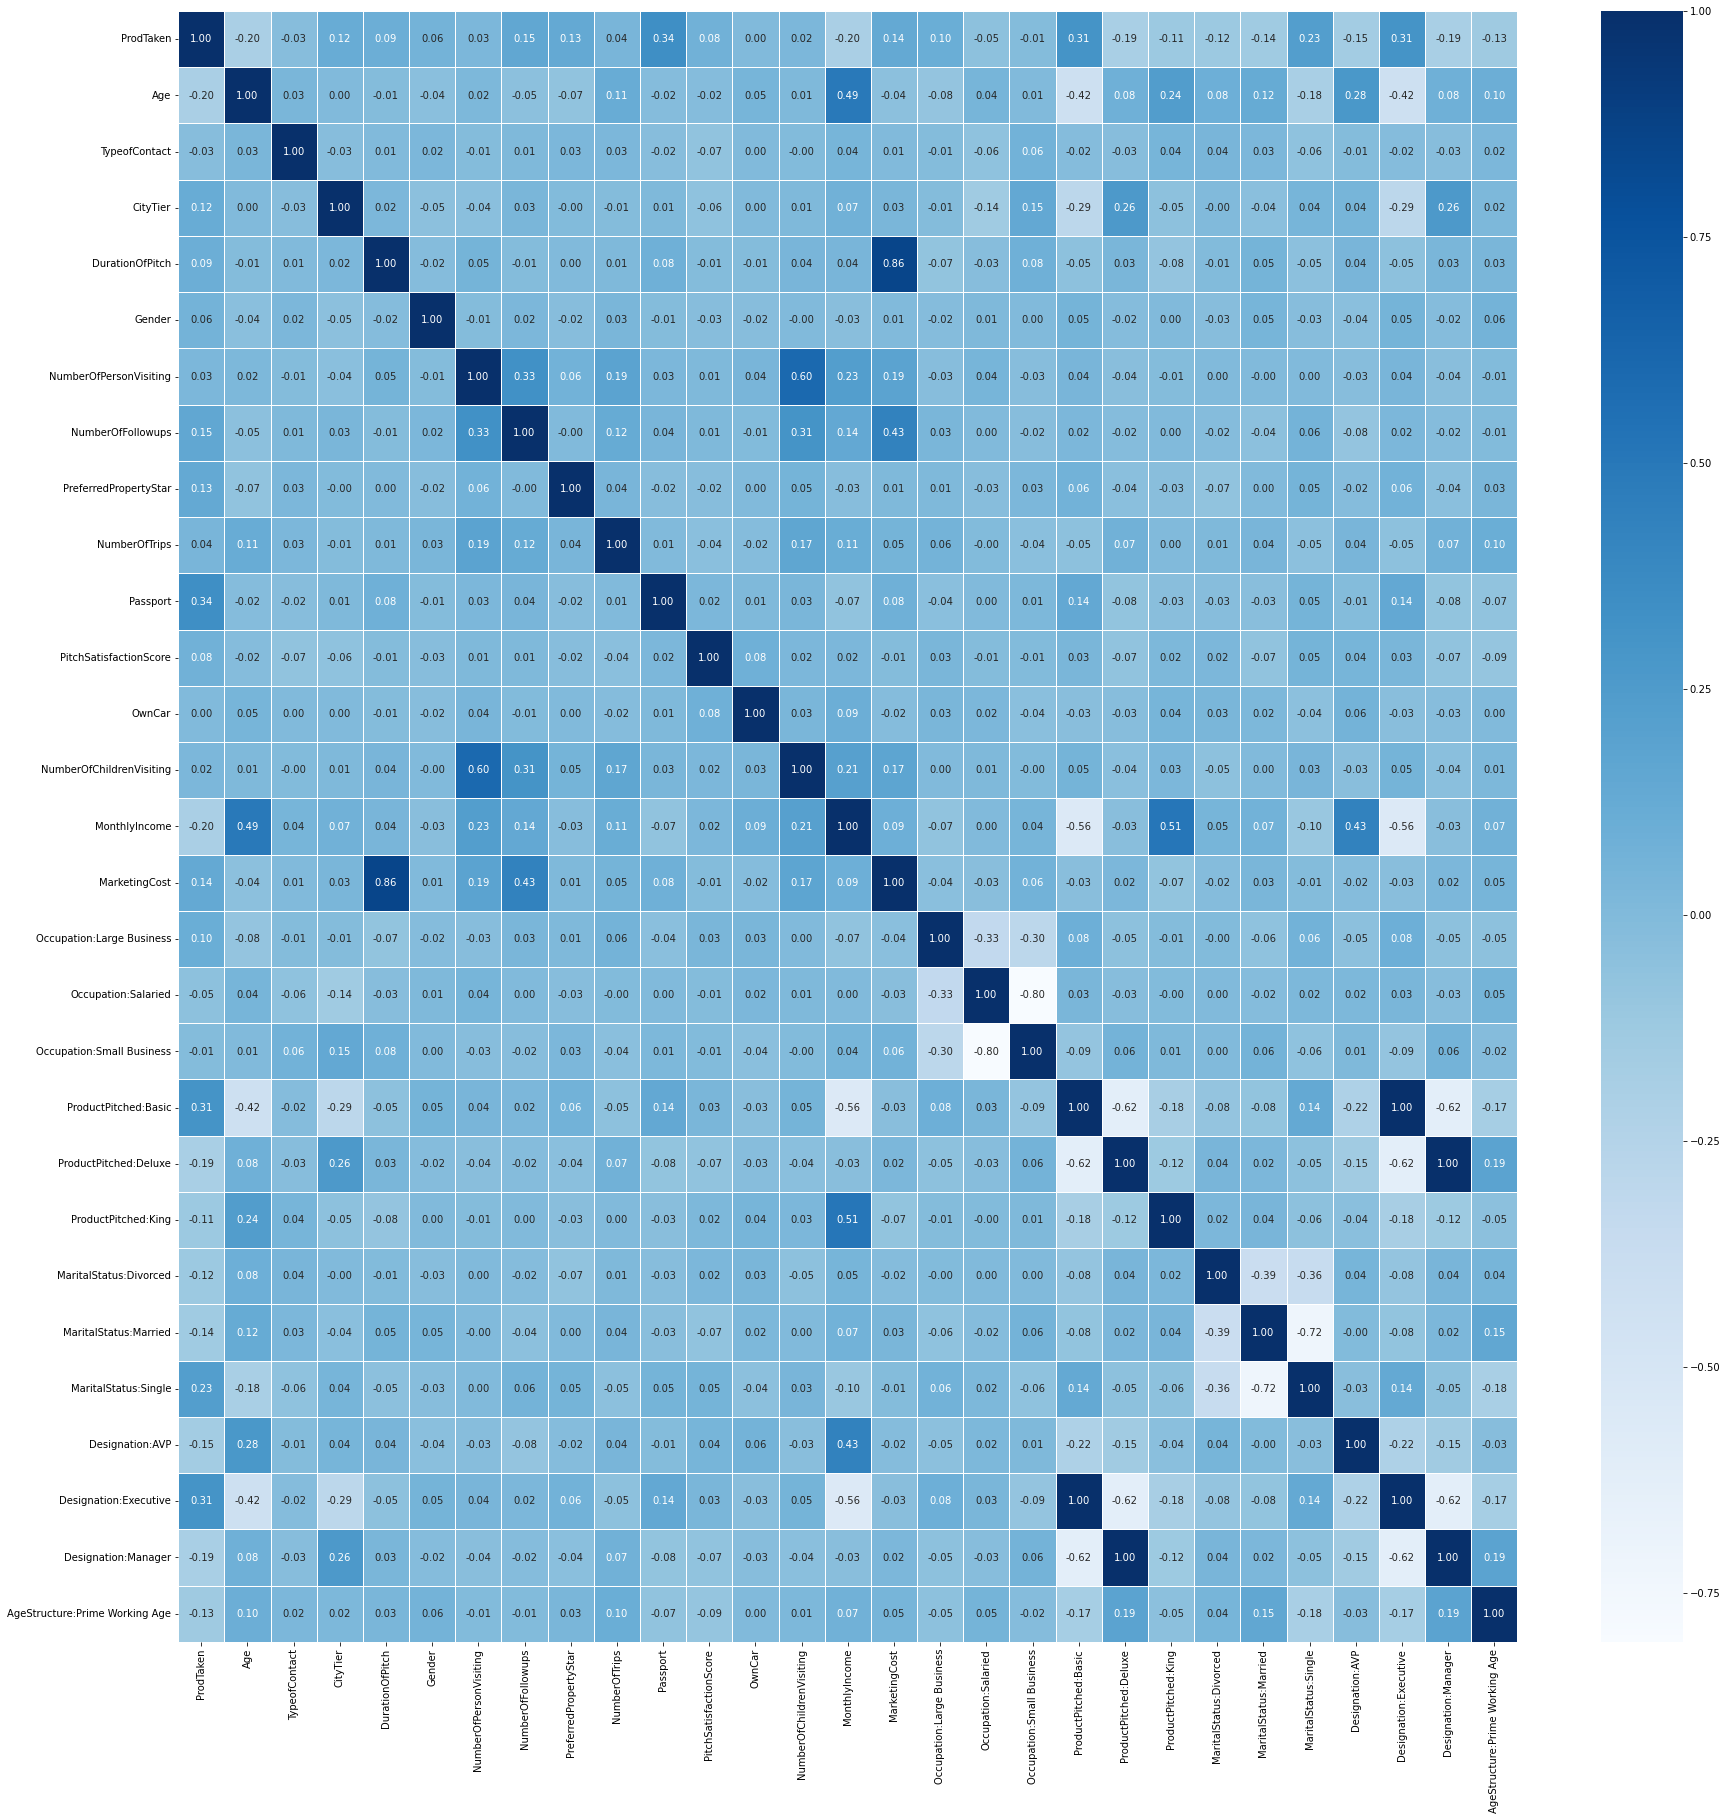

In [62]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(),cmap='Blues',annot=True, fmt='.2f',linewidth=1)

## **Modelling**

In [63]:
y_train = train.ProdTaken
X_train = train.drop(['ProdTaken', 'DurationOfPitch','Designation:Executive', 'Designation:Manager', 'MaritalStatus:Married','Occupation:Small Business'], axis= 1)

y_test = test.ProdTaken
X_test = test.drop(['ProdTaken', 'DurationOfPitch','Designation:Executive', 'Designation:Manager','MaritalStatus:Married','Occupation:Small Business'], axis= 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6034, 23), (1550, 23), (6034,), (1550,))

### **Data Validation**

In [64]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support

In [65]:
# cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

In [66]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Train Set): %.2f" % model.score(xtrain, ytrain))
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("\nPrecision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))


def evaluate_prediction(y_test, y_pred):
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_test, y_pred) * 100
    # Calculate model precision, recall and f1 score using "weighted average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    model_evaluation = {"accuracy": model_accuracy,
                      "precision": model_precision,
                      "recall": model_recall,
                      "f1": model_f1}
    return model_evaluation

### **Supervised Learning**

In [67]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42) 
scores = cross_val_score(model_rf, X_train, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.9927228027496267

In [68]:
# Fit the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)
eval_classification(model_rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.91

Precision (Test Set): 0.97
Recall (Test Set): 0.84
F1-Score (Test Set): 0.90
AUC: 0.91


In [69]:
%%time
# List of hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 4)]
max_depth = [3] 
min_samples_split = [20,30, 40, 50, 75, 100] 
min_samples_leaf = [10, 20, 30, 40, 50] 
max_features = ['auto', 'sqrt','log2'] 
criterion = ['gini','entropy']

hyperparameters = dict(max_depth=max_depth, 
                       n_estimators=n_estimators,
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion)

# Inisialisasi Model
rf = RandomForestClassifier(random_state=42)
model_rf = RandomizedSearchCV(rf, hyperparameters, cv=cv, random_state=42, scoring='roc_auc', n_jobs=-1)
model_rf.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model_rf.predict(X_test)
eval_classification(model_rf, y_pred, X_train, y_train, X_test, y_test)

D:\Fadhilah\Aplikasi\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.81

Precision (Test Set): 0.83
Recall (Test Set): 0.79
F1-Score (Test Set): 0.81
AUC: 0.81
Wall time: 1min 33s


In [70]:
model_rf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 233,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [73]:
model_rf.score(X_test[X_train.columns], y_test)

0.860298855359001

## **Final Model Evaluation**

In [74]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('Accuracy of Random Forest on training set: {:.2f}'
       .format(model_rf.score(X_train, y_train)))
print('Accuracy of Random Forest on test set: {:.2f}'
       .format(model_rf.score(X_test[X_train.columns], y_test)))

y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of Random Forest on training set: 0.87
Accuracy of Random Forest on test set: 0.86
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       775
         1.0       0.83      0.79      0.81       775

    accuracy                           0.81      1550
   macro avg       0.81      0.81      0.81      1550
weighted avg       0.81      0.81      0.81      1550



D:\Fadhilah\Aplikasi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


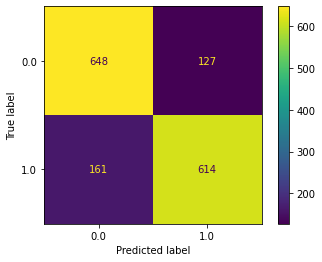

In [76]:
plot_confusion_matrix(model_rf,
                     X_test,
                     y_test,
                     values_format='d')